# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
import statsmodels.formula.api as smf 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import random

/Users/djurk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## LOAD DATA FRAMES AND MERGE

In [330]:
#Beautifulsoup df
movie = pd.read_csv('movies1.csv')
movie.head()

,Unnamed: 0,movie title,total tickets,release date,runtime (mins),rating,distributor,budget,widest release,in_release
0,0,Toy Story,43868300,1995-11-22,81.0,G,Buena Vista,NaN,2574.0,NaN
1,1,Batman Forever,42306000,1995-06-16,122.0,PG-13,Warner Bros.,$100 million,2893.0,147
2,2,Apollo 13,39556600,1995-06-30,140.0,PG,Universal,NaN,2347.0,NaN
3,3,Pocahontas,32547100,1995-06-16,81.0,G,Buena Vista,NaN,2757.0,NaN
4,4,Ace Ventura:When Nature Calls,24898500,1995-11-10,94.0,PG-13,Warner Bros.,NaN,2705.0,NaN


In [331]:
#Selenium df
imdb = pd.read_csv('IMDBfinal.csv')
imdb.head()

,Unnamed: 0,IMDB rating,movie title
0,0,8.3,Toy Story
1,1,5.4,Batman Forever
2,2,7.6,Apollo 13
3,3,6.7,Pocahontas
4,4,6.3,Ace Ventura:When Nature Calls


In [332]:
#merge on right so all rows with no IMDB rating get removed
df = pd.merge(movie,imdb, on='movie title', how='right')

In [333]:
df.head()

,Unnamed: 0_x,movie title,total tickets,release date,runtime (mins),rating,distributor,budget,widest release,in_release,Unnamed: 0_y,IMDB rating
0,0,Toy Story,43868300,1995-11-22,81.0,G,Buena Vista,NaN,2574.0,NaN,0,8.3
1,1,Batman Forever,42306000,1995-06-16,122.0,PG-13,Warner Bros.,$100 million,2893.0,147,1,5.4
2,2,Apollo 13,39556600,1995-06-30,140.0,PG,Universal,NaN,2347.0,NaN,2,7.6
3,3,Pocahontas,32547100,1995-06-16,81.0,G,Buena Vista,NaN,2757.0,NaN,3,6.7
4,4,Ace Ventura:When Nature Calls,24898500,1995-11-10,94.0,PG-13,Warner Bros.,NaN,2705.0,NaN,4,6.3


# CLEANING

In [334]:
df.columns

Index(['Unnamed: 0_x', 'movie title', 'total tickets', 'release date',
       'runtime (mins)', 'rating', 'distributor', 'budget', 'widest release',
       'in_release', 'Unnamed: 0_y', 'IMDB rating'],
      dtype='object')

In [335]:
df = df.drop('Unnamed: 0_x', axis = 1)

In [336]:
df = df.drop('Unnamed: 0_y', axis = 1)

In [337]:
df.head()

,movie title,total tickets,release date,runtime (mins),rating,distributor,budget,widest release,in_release,IMDB rating
0,Toy Story,43868300,1995-11-22,81.0,G,Buena Vista,NaN,2574.0,NaN,8.3
1,Batman Forever,42306000,1995-06-16,122.0,PG-13,Warner Bros.,$100 million,2893.0,147,5.4
2,Apollo 13,39556600,1995-06-30,140.0,PG,Universal,NaN,2347.0,NaN,7.6
3,Pocahontas,32547100,1995-06-16,81.0,G,Buena Vista,NaN,2757.0,NaN,6.7
4,Ace Ventura:When Nature Calls,24898500,1995-11-10,94.0,PG-13,Warner Bros.,NaN,2705.0,NaN,6.3


In [338]:
#replace top 5 distributors (combined list of each year) with 1, all others with 0.  This is to see the effect 
#of having a top distributor on ticket sales
for i, row in df.iterrows():
    if row['distributor'] == 'Sony / Columbia':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == '20th Century Fox':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Buena Vista':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Universal':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Warner Bros.':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Lionsgate':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Paramount':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'Dreamworks SKG':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'New Line':
        df.loc[i, 'distributor'] = 1
    elif row['distributor'] == 'MGM':
        df.loc[i, 'distributor'] = 1
    else:
        df.loc[i, 'distributor'] = 0

In [339]:
#removing nans from widest release... 
df = df[df['widest release'] > 0]

In [344]:
#removing nan rows from runtime
df = df[df['runtime (mins)'] > 0]

In [348]:
#removing two movies that are 9 and 12 hours long..
df = df[df['runtime (mins)'] < 400]

In [396]:
df.isnull().sum()

total tickets     0
runtime (mins)    0
rating            0
distributor       0
widest release    0
IMDB rating       0
dtype: int64

In [397]:
#about 1000 rows removed from original df
len(df)

9267

In [354]:
#combine unknown, unrated, and not yet rated into 1 group
for i, row in df.iterrows():
    if row['rating'] == 'Unknown':
        df.loc[i, 'rating'] = 'Unrated'
    if row['rating'] == 'Not Yet Rated':
        df.loc[i, 'rating'] = 'Unrated'

In [355]:
#way too many nans
df = df.drop('budget', axis = 1)

In [356]:
#way too many nans
df = df.drop('in_release', axis = 1)

In [357]:
#title won't help our model.
df = df.drop('movie title', axis = 1)

In [358]:
df = df.drop('release date', axis = 1)

In [359]:
df.head()

,total tickets,runtime (mins),rating,distributor,widest release,IMDB rating
0,43868300,81.0,G,1,2574.0,8.3
1,42306000,122.0,PG-13,1,2893.0,5.4
2,39556600,140.0,PG,1,2347.0,7.6
3,32547100,81.0,G,1,2757.0,6.7
4,24898500,94.0,PG-13,1,2705.0,6.3


In [442]:
#dummify "rating"
df_dummy = pd.get_dummies(df)

df_dummy.head()

,total tickets,runtime (mins),distributor,widest release,IMDB rating,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_Unrated
0,43868300,81.0,1,2574.0,8.3,1,0,0,0,0,0
1,42306000,122.0,1,2893.0,5.4,0,0,0,1,0,0
2,39556600,140.0,1,2347.0,7.6,0,0,1,0,0,0
3,32547100,81.0,1,2757.0,6.7,1,0,0,0,0,0
4,24898500,94.0,1,2705.0,6.3,0,0,0,1,0,0


In [443]:
df_dummy.head()

,total tickets,runtime (mins),distributor,widest release,IMDB rating,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_Unrated
0,43868300,81.0,1,2574.0,8.3,1,0,0,0,0,0
1,42306000,122.0,1,2893.0,5.4,0,0,0,1,0,0
2,39556600,140.0,1,2347.0,7.6,0,0,1,0,0,0
3,32547100,81.0,1,2757.0,6.7,1,0,0,0,0,0
4,24898500,94.0,1,2705.0,6.3,0,0,0,1,0,0


## Check out initial correlations 

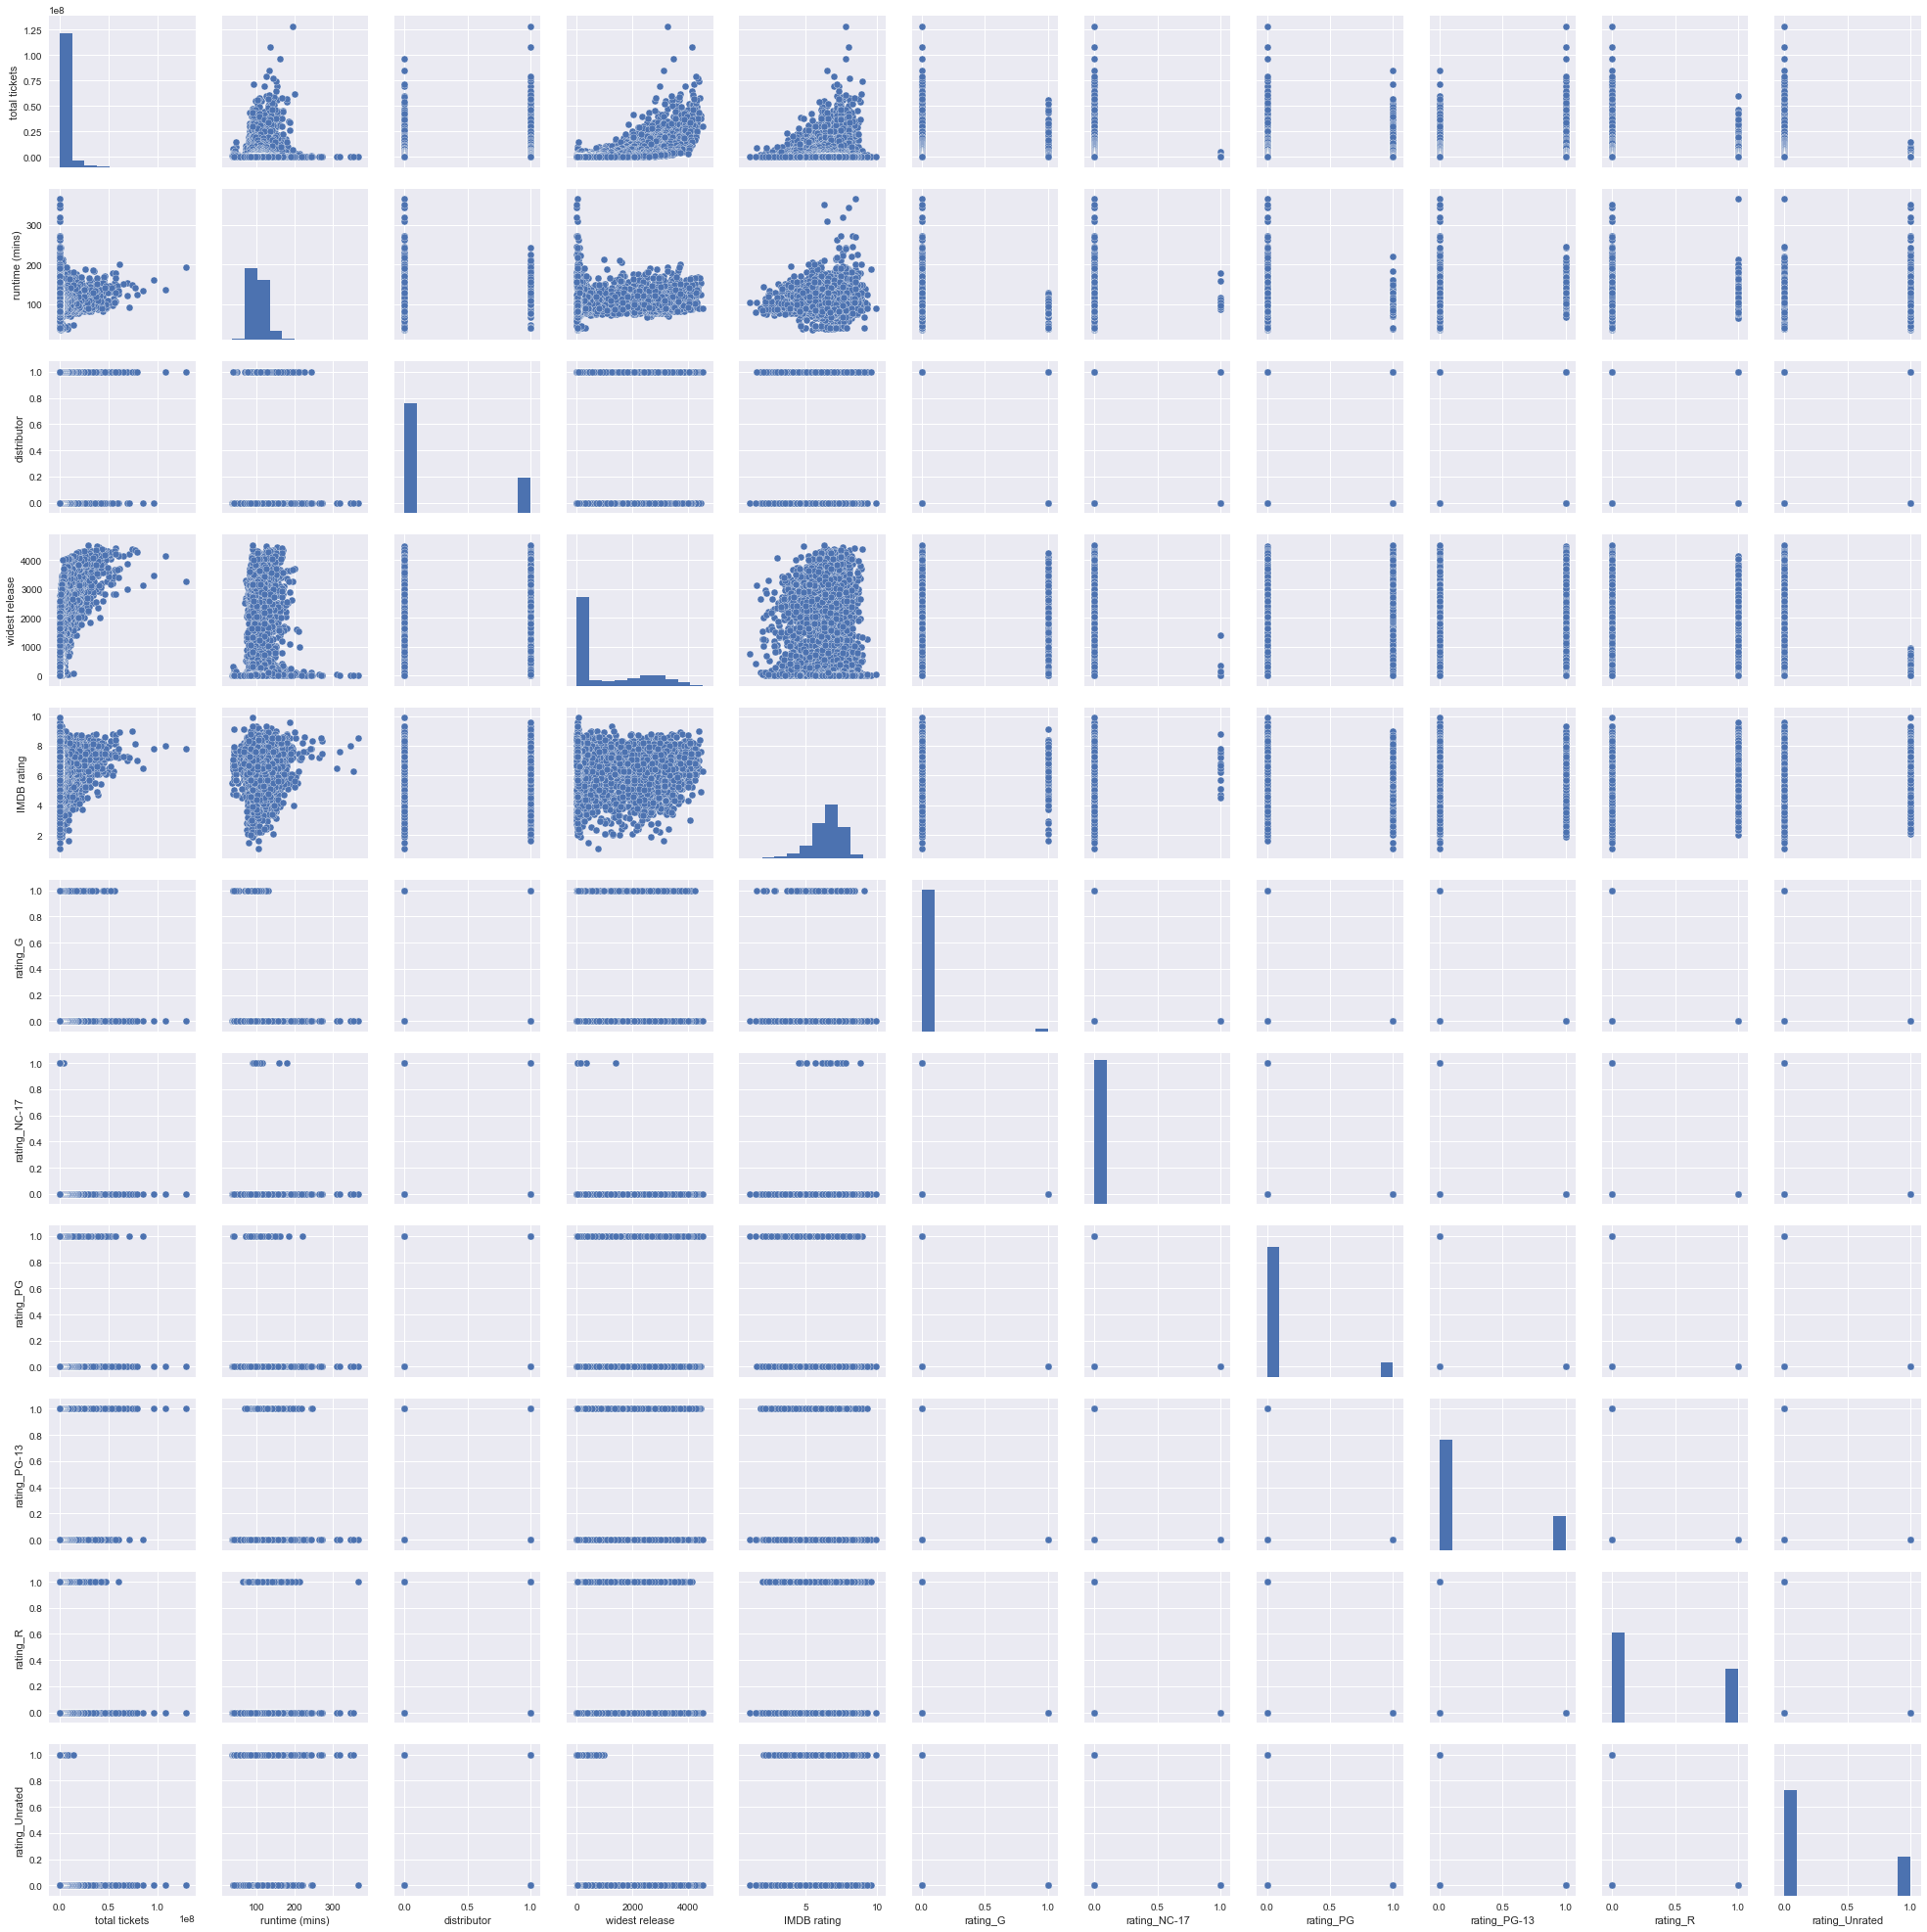

In [362]:
sns.pairplot(df_dummy);

In [446]:
df_dummy.corr()

,total tickets,runtime (mins),distributor,widest release,IMDB rating,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_Unrated
total tickets,1.000000,0.176750,0.428129,0.697474,0.063795,0.079930,-0.015823,0.140201,0.243227,-0.082681,-0.260765
runtime (mins),0.176750,1.000000,0.086089,0.106307,0.166079,-0.134431,0.006936,-0.084021,0.051557,0.015258,0.032930
distributor,0.428129,0.086089,1.000000,0.604285,-0.105084,0.102992,-0.012397,0.134327,0.227104,0.001934,-0.341067
widest release,0.697474,0.106307,0.604285,1.000000,-0.138915,0.073407,-0.026349,0.202541,0.338002,-0.039064,-0.437957
IMDB rating,0.063795,0.166079,-0.105084,-0.138915,1.000000,-0.007854,0.002178,-0.067420,-0.094268,0.012809,0.124052
rating_G,0.079930,-0.134431,0.102992,0.073407,-0.007854,1.000000,-0.006085,-0.047801,-0.078389,-0.109357,-0.086388
rating_NC-17,-0.015823,0.006936,-0.012397,-0.026349,0.002178,-0.006085,1.000000,-0.014438,-0.023677,-0.033030,-0.026093
rating_PG,0.140201,-0.084021,0.134327,0.202541,-0.067420,-0.047801,-0.014438,1.000000,-0.186001,-0.259482,-0.204980
rating_PG-13,0.243227,0.051557,0.227104,0.338002,-0.094268,-0.078389,-0.023677,-0.186001,1.000000,-0.425530,-0.336152
rating_R,-0.082681,0.015258,0.001934,-0.039064,0.012809,-0.109357,-0.033030,-0.259482,-0.425530,1.000000,-0.468950


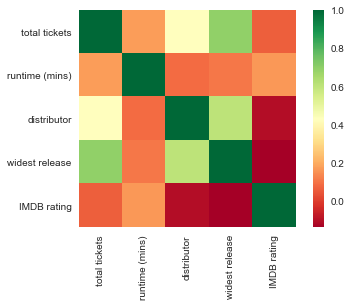

In [445]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

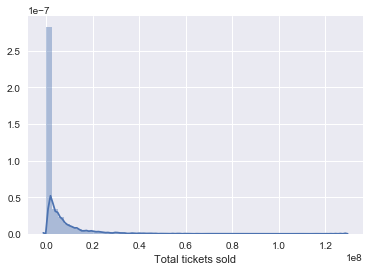

In [774]:
#plotting target variable..
sns.distplot(df_dummy['total tickets'], axlabel = 'Total tickets sold');

In [447]:
#target looks very skewed so we are going to take the log values.
df_dummy['ticket_log'] = np.log(df_dummy['total tickets'])

In [448]:
df_dummy.head()

,total tickets,runtime (mins),distributor,widest release,IMDB rating,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_Unrated,ticket_log
0,43868300,81.0,1,2574.0,8.3,1,0,0,0,0,0,17.596703
1,42306000,122.0,1,2893.0,5.4,0,0,0,1,0,0,17.560439
2,39556600,140.0,1,2347.0,7.6,0,0,1,0,0,0,17.493243
3,32547100,81.0,1,2757.0,6.7,1,0,0,0,0,0,17.298199
4,24898500,94.0,1,2705.0,6.3,0,0,0,1,0,0,17.030318


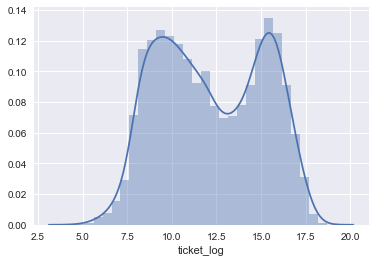

In [449]:
#looks better!
sns.distplot(df_dummy['ticket_log'])

## SPLITTING DATA INTO TRAIN AND HOLDOUT

In [711]:
X = df_dummy.loc[:,['runtime (mins)', 'distributor', 'widest release', 'IMDB rating',       
                    'rating_G','rating_NC-17', 'rating_PG','rating_PG-13', 'rating_R', 'rating_Unrated']]
y = df_dummy['total tickets']

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y , test_size=.3, random_state=0)

In [776]:
#it seems that the P value for rating_G is pretty high, so let's remove it later.

model = sm.OLS(y_train,sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total tickets   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     840.6
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:10:29   Log-Likelihood:            -1.0934e+05
No. Observations:                6486   AIC:                         2.187e+05
Df Residuals:                    6476   BIC:                         2.188e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -9.35e+06   4.64e+05    -20.167      0.000   -1.03e+07   -8.44e+06
runtime (mins)  3.184e+04   3272.241      9.731      0.000    2.54e+04    3.83e+04
distributor     4.248e+05   1.86e+05      2.280      0.023    5.96e+04     7.9e+05
widest release  4146.2239     69.031     60.063      0.000    4010.901    4281.547
IMDB rating     1.132e+06   6.29e+04     17.982      0.000    1.01e+06    1.25e+06
rating_G        3.783e+05   4.37e+05      0.865      0.387   -4.79e+05    1.24e+06
rating_NC-17   -1.918e+06   1.17e+06     -1.641      0.101   -4.21e+06    3.74e+05
rating_PG       -1.58e+06   2.77e+05     -5.712      0.000   -2.12e+06   -1.04e+06
rating_PG-13     -1.9e+06   2.51e+05     -7.585      0.000   -2.39e+06   -1.41e+06
rating_R       -2.654e+06   2.38e+05    -11.141      0.000   -3.12e+06   -2.19e+06
rating_Unrated -1.677e+06   2.53e+05     -6.618      0.000   -2.17e+06   -1.18e+06
==============================================================================
Omnibus:                     6156.042   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485402.558
Skew:                           4.375   Prob(JB):                         0.00
Kurtosis:                      44.468   Cond. No.                     9.47e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [775]:
# base case with 1 variable.
model = sm.OLS(y_train,sm.add_constant(X_train['widest release']))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total tickets   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6441.
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        11:44:58   Log-Likelihood:            -1.0961e+05
No. Observations:                6486   AIC:                         2.192e+05
Df Residuals:                    6484   BIC:                         2.192e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.979e+05   8.16e+04     -7.330      0.000   -7.58e+05   -4.38e+05
widest release  4181.8770     52.107     80.256      0.000    4079.731    4284.023
==============================================================================
Omnibus:                     6287.098   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           503566.464
Skew:                           4.532   Prob(JB):                         0.00
Kurtosis:                      45.204   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [627]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x.reshape(6486,1),y)
    pred = rgr.predict(x.reshape(6486,1))

#REGRESSION FIT
    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")

#RESIDUAL PLOT    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
#QQ PLOT
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

/Users/djurk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/djurk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


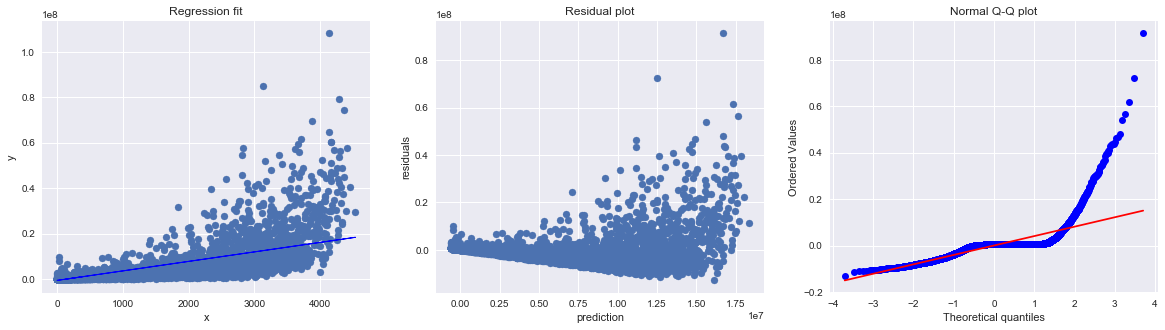

In [628]:
diagnostic_plot(X_train['widest release'], y_train)

/Users/djurk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/djurk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


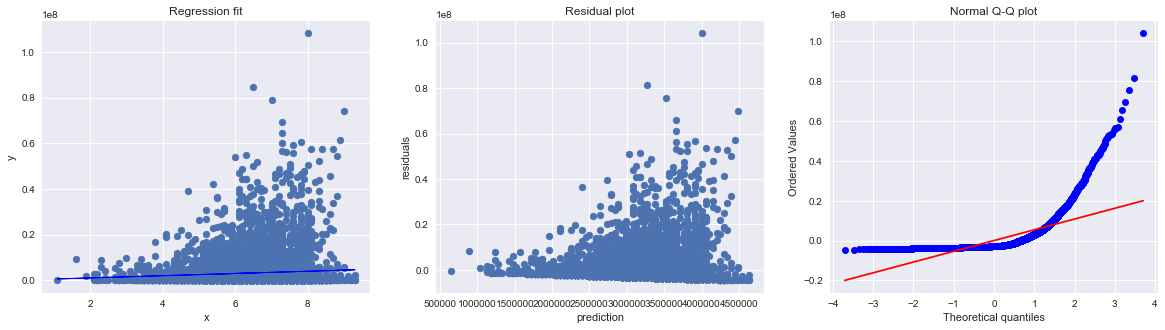

In [629]:
diagnostic_plot(X_train['IMDB rating'], y_train)

Text(0,0.5,'Residual')

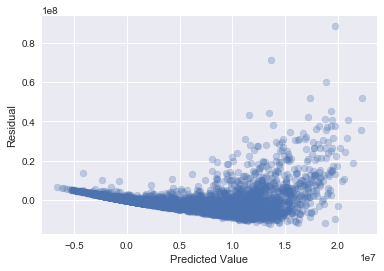

In [630]:
#our residual plots seem to show us that we need a polynomial factor
y_pred = fit.predict(sm.add_constant(X_train))

plt.scatter(y_pred,y_train-y_pred,alpha=.3)
plt.plot()
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

## FROM THESE INITIAL PLOTS, IT IS APPARENT THAT I NEED TO ADD A POLYNOMIAL FACTOR.  

### SINCE MY TARGET WAS EXTREMELY SKEWED AS WELL, I'LL BE MODELLING AGAINST THE LOGGED TARGET VARIABLE.

In [713]:
#RE - SPLITTING
X_log = df_dummy.loc[:,['runtime (mins)', 'distributor', 'widest release', 'IMDB rating','rating_NC-17', 'rating_PG','rating_PG-13', 'rating_R', 'rating_Unrated']]
y_log = df_dummy['ticket_log']

X_log_train, X_log_holdout, y_log_train, y_log_holdout = train_test_split(X_log, y_log , test_size=.3, random_state=0)

model = sm.OLS(y_log_train,sm.add_constant(X_log_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2287.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:27:16   Log-Likelihood:                -11560.
No. Observations:                6486   AIC:                         2.314e+04
Df Residuals:                    6476   BIC:                         2.321e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.5810      0.182     47.161      0.000       8.224       8.938
runtime (mins)     0.0131      0.001     14.146      0.000       0.011       0.015
distributor        0.4920      0.053      9.308      0.000       0.388       0.596
widest release     0.0016   1.96e-05     84.071      0.000       0.002       0.002
IMDB rating        0.2432      0.018     13.619      0.000       0.208       0.278
rating_NC-17       0.3875      0.406      0.953      0.340      -0.409       1.184
rating_PG         -0.6249      0.139     -4.493      0.000      -0.898      -0.352
rating_PG-13      -0.6165      0.134     -4.616      0.000      -0.878      -0.355
rating_R          -0.6983      0.132     -5.286      0.000      -0.957      -0.439
rating_Unrated    -1.9983      0.136    -14.686      0.000      -2.265      -1.732
==============================================================================
Omnibus:                       56.817   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.229
Skew:                           0.012   Prob(JB):                     1.55e-20
Kurtosis:                       3.580   Cond. No.                     3.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

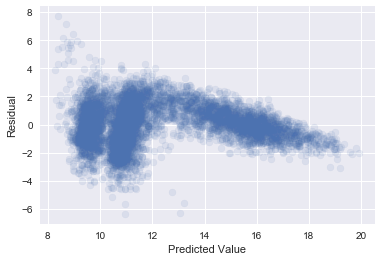

In [714]:
#log residuals
y_pred = fit.predict(sm.add_constant(X_log_train))

plt.scatter(y_pred,y_log_train-y_pred,alpha=.1)
plt.plot()
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

## FEATURE SELECTION

In [715]:
#testing R^2 on highest impact feature
model = sm.OLS(y_log_train,sm.add_constant(X_log_train['widest release']))
fit_single = model.fit()
fit_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.571e+04
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:27:34   Log-Likelihood:                -12207.
No. Observations:                6486   AIC:                         2.442e+04
Df Residuals:                    6484   BIC:                         2.443e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.3634      0.025    422.648      0.000      10.315      10.412
widest release     0.0020   1.57e-05    125.320      0.000       0.002       0.002
==============================================================================
Omnibus:                       32.210   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.319
Skew:                           0.084   Prob(JB):                     1.93e-06
Kurtosis:                       2.737   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [717]:
model = sm.OLS(y_log_train,sm.add_constant(X_log_train[['widest release','IMDB rating']]))
fit_single = model.fit()
fit_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     8142.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:27:42   Log-Likelihood:                -12123.
No. Observations:                6486   AIC:                         2.425e+04
Df Residuals:                    6483   BIC:                         2.427e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.7119      0.129     67.579      0.000       8.459       8.965
widest release     0.0020   1.56e-05    127.512      0.000       0.002       0.002
IMDB rating        0.2490      0.019     13.043      0.000       0.212       0.286
==============================================================================
Omnibus:                       36.211   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.775
Skew:                           0.044   Prob(JB):                     1.53e-06
Kurtosis:                       2.698   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [743]:
model = sm.OLS(y_log_train,sm.add_constant(X_log_train[['widest release','IMDB rating','distributor']]))
fit_single = model.fit()
fit_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     5614.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:14:43   Log-Likelihood:                -12044.
No. Observations:                6486   AIC:                         2.410e+04
Df Residuals:                    6482   BIC:                         2.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6418      0.127     67.785      0.000       8.392       8.892
widest release     0.0018   1.92e-05     96.084      0.000       0.002       0.002
IMDB rating        0.2540      0.019     13.467      0.000       0.217       0.291
distributor        0.7113      0.056     12.624      0.000       0.601       0.822
==============================================================================
Omnibus:                       19.566   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.117
Skew:                           0.047   Prob(JB):                     0.000316
Kurtosis:                       2.775   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [744]:
model = sm.OLS(y_log_train,sm.add_constant(X_log_train[['widest release','IMDB rating','distributor','runtime (mins)']]))
fit_single = model.fit()
fit_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     4310.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:15:15   Log-Likelihood:                -11989.
No. Observations:                6486   AIC:                         2.399e+04
Df Residuals:                    6481   BIC:                         2.402e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.8222      0.148     52.733      0.000       7.531       8.113
widest release     0.0018   1.92e-05     95.249      0.000       0.002       0.002
IMDB rating        0.2185      0.019     11.500      0.000       0.181       0.256
distributor        0.6922      0.056     12.383      0.000       0.583       0.802
runtime (mins)     0.0103      0.001     10.562      0.000       0.008       0.012
==============================================================================
Omnibus:                        8.465   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.515
Skew:                           0.087   Prob(JB):                       0.0142
Kurtosis:                       2.965   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#I ended up deciding on keeping all the features (besides rating_G which we removed)

## MULTI VARIABLE REGRESSION

In [745]:
model = sm.OLS(y_log_train,sm.add_constant(X_log_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ticket_log   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     2287.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:17:27   Log-Likelihood:                -11560.
No. Observations:                6486   AIC:                         2.314e+04
Df Residuals:                    6476   BIC:                         2.321e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.5810      0.182     47.161      0.000       8.224       8.938
runtime (mins)     0.0131      0.001     14.146      0.000       0.011       0.015
distributor        0.4920      0.053      9.308      0.000       0.388       0.596
widest release     0.0016   1.96e-05     84.071      0.000       0.002       0.002
IMDB rating        0.2432      0.018     13.619      0.000       0.208       0.278
rating_NC-17       0.3875      0.406      0.953      0.340      -0.409       1.184
rating_PG         -0.6249      0.139     -4.493      0.000      -0.898      -0.352
rating_PG-13      -0.6165      0.134     -4.616      0.000      -0.878      -0.355
rating_R          -0.6983      0.132     -5.286      0.000      -0.957      -0.439
rating_Unrated    -1.9983      0.136    -14.686      0.000      -2.265      -1.732
==============================================================================
Omnibus:                       56.817   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.229
Skew:                           0.012   Prob(JB):                     1.55e-20
Kurtosis:                       3.580   Cond. No.                     3.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [588]:
#We saw earlier that our model might need some polynomial transformation...so more complexity!
def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [589]:
#maybe it will need more complexity?? let's define a 3rd degree polynomial function as well.
def add_cube_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**3'] = df[c]**3
        
    return df_poly

In [590]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [767]:
#y = log
from sklearn.model_selection import train_test_split

X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_log_train, y_log_train
                                                              , test_size=.2, random_state=1)

lm = LinearRegression()
lm.fit(X_train_m, y_train_m)
print('OLS regression score val R^2: %.3f' % lm.score(X_val_m, y_val_m))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val_m), y_val_m))

lm.fit(add_cube_terms(X_train_m), y_train_m)
print('Degree 3 polynomial regression val R^2: %.3f' 
      % lm.score(add_cube_terms(X_val_m), y_val_m))
print('Degree 3 polynomial regression score val RMSE: %.3f \n' 
      % RMSE(lm.predict(add_cube_terms(X_val_m)), y_val_m))

lm.fit(add_square_terms(X_train_m), y_train_m)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val_m), y_val_m))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val_m)), y_val_m))



OLS regression score val R^2: 0.771
OLS regression score val RMSE: 1.403 

Degree 3 polynomial regression val R^2: 0.799
Degree 3 polynomial regression score val RMSE: 1.312 

Degree 2 polynomial regression val R^2: 0.812
Degree 2 polynomial regression score val RMSE: 1.272


#### Increasing the complexity to 2nd degree polynomial improved our model, but increasing it further to 3rd degree made it worse.  Let's stick with the 2nd.

Text(0,0.5,'Residual')

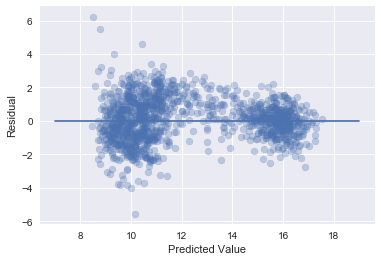

In [747]:
#Our residual plot looks much better with degree 2 polynomials.

y_pred_m = lm.predict(add_square_terms(X_val_m))

plt.scatter(y_pred_m,y_val_m-y_pred_m,alpha=.3)
plt.plot(np.linspace(7,19,100),np.linspace(0,0,100))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

## SCALED REGULARIZATION MODELS

### Since our original model needed added complexity (hence the 2nd and 3rd degree polynomial tests), I expect lasso and ridge regularization to not help my model at all (since they reduce complexity).  

In [748]:
X_log_train.head()

,runtime (mins),distributor,widest release,IMDB rating,rating_NC-17,rating_PG,rating_PG-13,rating_R,rating_Unrated
9380,126.0,0,135.0,6.6,0,0,1,0,0
3776,100.0,0,206.0,6.6,0,0,1,0,0
2511,92.0,0,8.0,5.4,0,0,0,1,0
2676,101.0,1,3418.0,5.9,0,0,1,0,0
5713,119.0,0,10.0,7.6,0,0,1,0,0


In [749]:
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_log_train, y_log_train
                                                              , test_size=.2, random_state=1)

In [750]:
scaler = StandardScaler()
scaler.fit(X_train_r)
X_tr = scaler.transform(X_train_r)
X_te = scaler.transform(X_val_r)

In [751]:
alphavec = 10**np.linspace(-4,5,100)

lasso_model = LassoCV(alphas = alphavec, cv=5, random_state=1)
lasso_model.fit(X_tr,y_train_r)


LassoCV(alphas=array([  1.00000e-04,   1.23285e-04, ...,   8.11131e+04,   1.00000e+05]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
    verbose=False)

In [752]:
#looks like we don't need regularization.
lasso_model.alpha_

0.0001

In [753]:
list(zip(X_train.columns,lasso_model.coef_))

[('runtime (mins)', 0.23585613889359913),
 ('distributor', 0.21533690896191854),
 ('widest release', 2.0774044831226215),
 ('IMDB rating', 0.24675840992299841),
 ('rating_G', 0.013783675504609318),
 ('rating_NC-17', -0.2075222889079886),
 ('rating_PG', -0.27281179673828071),
 ('rating_PG-13', -0.35992405472961669),
 ('rating_R', -0.89852679917184008)]

In [754]:
lasso_model.score(X_te,y_val_r)

0.77101219085630612

In [755]:
lasso_test = lasso_model.predict(X_te)

In [756]:
np.sqrt(np.mean((lasso_test - y_val_r)**2))

1.4025181661211501

## RIDGE

In [757]:
alphavec = 10**np.linspace(-3,5,100)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_tr,y_train_r)

RidgeCV(alphas=array([  1.00000e-03,   1.20450e-03, ...,   8.30218e+04,   1.00000e+05]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [758]:
ridge_model.alpha_

1.1768119524349991

In [759]:
ridge_test = ridge_model.predict(X_te)

In [760]:
np.sqrt(np.mean((ridge_test - y_val_r)**2))

1.4025197791089297

In [761]:
ridge_model.score(X_te,y_val_r)

0.77101166415403721

## DEGREE 2 POLYNOMIAL MODEL GAVE ME THE BEST R^2 AND LOWEST RMSE.. TIME TO DO A FINAL VALIDATION AND INPUT HOLDOUT

In [769]:
cv_r2_list = []

In [770]:
#just to be sure that this model gives the highest r^2...
for r in range(0,5):
    X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(X_log_train, y_log_train
                                                              , test_size=.2, random_state=random.randint(0,100))

    lm.fit(add_square_terms(X_train_cv), y_train_cv)
    cv_r2_list.append(lm.score(add_square_terms(X_val_cv), y_val_cv))

print ('List of R^2:{}'.format(cv_r2_list))


List of R^2:[0.79201650827802828, 0.80431305506969242, 0.80045384891275373, 0.79926019719001462, 0.82528679859284615]


In [771]:
cv_r2_list_mean = np.mean(cv_r2_list)

In [772]:
cv_r2_list_mean

0.80426608160866719

# FINAL TEST

In [768]:
#fitting the holdout data to the training set.. results are good!
lm = LinearRegression()
lm.fit(add_square_terms(X_log_train), y_log_train)
print(lm.score(add_square_terms(X_log_holdout), y_log_holdout))

0.810485355508


In [741]:
#coefficients.  hard to interpret because of the log.
list(zip(X_log_train.columns,lm.coef_))

[('runtime (mins)', 0.013686100837829198),
 ('distributor', 0.084206353430383504),
 ('widest release', 0.0035291405226557551),
 ('IMDB rating', -0.27115485662488248),
 ('rating_NC-17', 0.25105717199847816),
 ('rating_PG', -0.25457455865619472),
 ('rating_PG-13', -0.33004797059163316),
 ('rating_R', -0.38837969521143578),
 ('rating_Unrated', -0.86438131805773177)]

Text(0,0.5,'Residual')

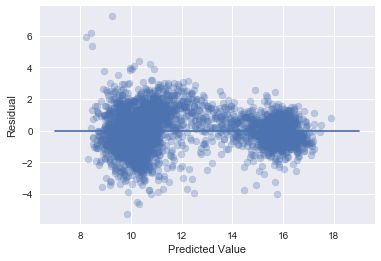

In [742]:
#residual plot of my fitted training model on the holdout set.  looks real similar to the residuals of my training set! 
y_pred_final = lm.predict(add_square_terms(X_log_holdout))

plt.scatter(y_pred_final,y_log_holdout-y_pred_final,alpha=.3)
plt.plot(np.linspace(7,19,100),np.linspace(0,0,100))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

